문제 및 정의 <br>
데이터셋 획득, 전처리 및 피처 엔지니어링<br>
모델정의 <br>
결과 및 측정 항목 이해

1. 데이터셋 정의 및 획득


ETL
    

In [2]:
import pandas as pd
from sklearn import datasets

In [9]:
df=pd.read_excel("Iris.xlsx")

In [10]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,virginica 점수,setosa 점수,versicolor 점수,최대값,prediction,(채점),Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,7.9,3.8,6.4,2.0,Iris-virginica,38,54,25,54,Iris-setosa,0,NaN,점수,0.77
1,2,4.4,3.0,1.3,0.2,Iris-setosa,29,50,37,50,Iris-setosa,1,NaN,NaN,NaN
2,3,6.3,2.5,4.9,1.5,Iris-versicolor,22,28,30,30,Iris-versicolor,1,NaN,NaN,NaN


In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'virginica 점수', 'setosa 점수', 'versicolor 점수', '최대값',
       'prediction', '(채점)', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
print("mean :",df['SepalLengthCm'].mean())
print("std: ", df['SepalLengthCm'].std())
print("kurtosis :",df['SepalLengthCm'].kurtosis())
print("skewness :",df['SepalLengthCm'].skew())

mean : 5.825
std:  0.846188722174524
kurtosis : -0.37005197418817515
skewness : 0.40100481228916995


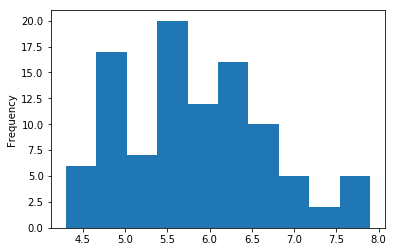

In [21]:
df['SepalLengthCm'].plot.hist()

통계치가 보여주듯이, 비대칭도가 양의 값을 가지기 때문에 왼쪽으로 왜곡돼어있으며, 첨도 메트릭에 표시된 것처럼 넓게 펴져잇다

#### 2D 작업

C:\Users\hieun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


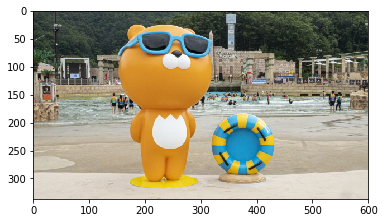

In [42]:
import scipy.misc
testimg=scipy.misc.imread("ra.jpg")
plt.imshow(testimg)

In [43]:
testimg.shape

(337, 600, 3)

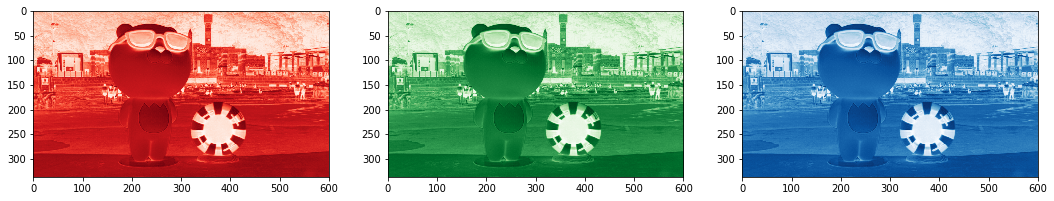

In [60]:

f = plt.figure(figsize=(18,15))
ax1 = f.add_subplot(131)
ax1.imshow(testimg[:,:,0],cmap="Reds")
ax2 = f.add_subplot(132)
ax2.imshow(testimg[:,:,0],cmap="Greens")
ax3 = f.add_subplot(133)
ax3.imshow(testimg[:,:,0],cmap="Blues")


원핫 인코딩

In [64]:
import numpy as np
def get_one_hot(input_vector):
    result=[]
    for i in input_vector:
        newval=np.zeros(max(input_vector))
        newval.itemset(i-1,1)
        result.append(newval)
    return result

In [65]:
get_one_hot([1,5,2,3,4])

[array([1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1.]),
 array([0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0.])]

데이터셋 전처리과정
- 정규화 및 피처 크기조정

#1. 정규화 또는 표준화: 데이터셋의 정규분포의 특성, 즉 평균0과 표준편차 1을 부여하는 것을 목표로 한다


In [68]:
from sklearn import preprocessing
import pandas as pd

In [70]:
df=pd.read_excel("Iris.xlsx")

In [72]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,virginica 점수,setosa 점수,versicolor 점수,최대값,prediction,(채점),Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,7.9,3.8,6.4,2.0,Iris-virginica,38,54,25,54,Iris-setosa,0,NaN,점수,0.77
1,2,4.4,3.0,1.3,0.2,Iris-setosa,29,50,37,50,Iris-setosa,1,NaN,NaN,NaN
2,3,6.3,2.5,4.9,1.5,Iris-versicolor,22,28,30,30,Iris-versicolor,1,NaN,NaN,NaN
3,4,4.6,3.6,1.0,0.2,Iris-setosa,33,62,35,62,Iris-setosa,1,NaN,NaN,NaN
4,5,5.5,2.4,3.8,1.1,Iris-versicolor,21,24,37,37,Iris-versicolor,1,NaN,NaN,NaN


In [77]:
partialcolumns=df['SepalWidthCm']
std_scale=preprocessing.StandardScaler().fit(partialcolumns)
df_std=std.scale.transform(partialcolumns)
plt.scatter(partialcolumns,df['SepalWidthCm'])

ValueError: Expected 2D array, got 1D array instead:
array=[3.8 3.  2.5 3.6 2.4 2.9 2.8 2.8 3.4 2.9 2.5 3.2 3.1 3.1 2.2 2.7 3.8 2.5
 3.2 3.4 3.  3.  2.7 3.8 2.3 3.  3.2 2.9 3.  3.6 3.4 2.8 2.6 3.1 2.3 3.2
 2.6 3.  3.2 3.  2.5 3.1 3.  2.4 4.  3.  3.  2.2 2.5 2.4 2.3 3.4 2.3 3.5
 2.7 3.8 3.1 2.5 2.8 3.5 3.4 3.  2.7 3.4 3.  3.  2.9 2.8 3.3 3.3 2.8 3.
 3.5 3.3 3.2 3.9 3.  2.7 3.7 4.2 3.9 3.1 2.7 4.4 2.8 3.  3.5 3.4 2.9 2.7
 3.4 3.8 2.7 3.1 3.  3.  2.8 2.6 2.9 2.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

손실함수 : 모델의 품질에 대한 측정 방법을 제공하고 잘못 선택하면, 모델의 정확성 또는 수렴 속도면에서 효용성이 떨어질수 있음


일반적인 훈련 용어:
    
1.반복: 기울기 오차를 계산하고 모델 파라미터를 조정하는 하나의 과정 <br>
2.배치: 데이터가 샘플 그룹으로 제공되면 이 그룹 각각을 배치<br>
3.크기: 배치당 샘플 수를 배치크기<br>
4.세대 : 전체 데이터셋을 한번 전달하는 것을 세대 <br>

파라미터의 초기화


In [79]:
mu,sigma=0,1
dist=np.random.normal(mu,sigma,1000)
dist

array([ 1.39578120e+00, -4.97490538e-01, -2.62083162e-01,  7.79601087e-01,
       -3.42069155e-01,  5.28115780e-01,  1.06618973e+00,  7.03694803e-01,
       -1.76107235e+00,  5.86950339e-01, -6.48740510e-01, -6.59422995e-01,
       -1.28453130e-01, -6.34814063e-01, -1.33005729e+00, -2.53157056e-01,
       -8.61625395e-02,  1.54420069e-02,  5.23174291e-01, -4.58371653e-01,
        4.74490049e-01, -4.10032339e-01, -2.14845402e+00, -1.57101859e+00,
        1.20469705e+00, -1.18658027e+00,  8.97630139e-01, -5.17301016e-02,
       -5.44187441e-01, -1.10987403e+00,  9.57667369e-01,  6.12961430e-02,
       -4.32887205e-01, -6.45613787e-01, -2.02384507e+00, -5.53318816e-01,
        9.18355994e-02, -3.07098172e-03,  1.38993029e+00,  4.91605767e-01,
       -1.00291218e-01,  1.56269621e+00, -1.97057138e+00, -5.62866377e-01,
       -1.09599283e+00, -8.92166045e-01, -1.29156225e+00, -5.88590502e-01,
        2.27568786e-01, -4.70808547e-01, -4.18333954e-01,  4.69672597e-01,
       -4.35186923e-01, -

In [81]:
dist=np.random.normal(mu,sigma,10)
dist

array([ 0.25766047, -2.32311804, -0.13765414,  1.36658806,  2.20839788,
        1.36917802, -1.05469322, -0.08691358,  0.83457614,  0.29107285])

모델 구현 및 결과 해석

회귀 메트릭 :

In [82]:
# 평균 절대 오차
# 중앙값 절대 오차
# 평균제곱 오차


분류 메트릭

1.정확도
2.점밀도, 재현율 및 f-측정
3.혼동행렬 : 모든 분류의 작업은 새로운 알려지지 않은 데이터에 대한 레이블이나 태그를 예측 하는 목표


[[0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2]]


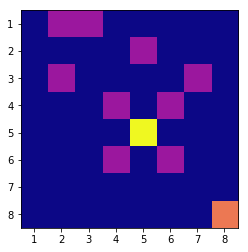

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_true=[8,5,6,8,5,3,1,6,4,2,5,3,1,4]
y_pred=[8,5,6,8,5,2,3,4,4,5,5,7,2,6]
y=confusion_matrix(y_true,y_pred)
print(y)

plt.imshow(confusion_matrix(y_true,y_pred),interpolation='nearest',cmap='plasma')
plt.xticks(np.arange(0,8),np.arange(1,9))
plt.yticks(np.arange(0,8),np.arange(1,9))
plt.show()

혼동행렬은 예측한 값과 실제값 쌍이 어떻게 예측이 이루어졌는가를 자세히 보여줄때 사용된다
이때, 그림에서와 같이 5,5인 점은 3개, (8,8)인점은 2개의 옳은 예측값을 내며 정확한 예측도를 의미한다

 <strong> 실루엣 계수 </strong><br>
 데이터셋의 레이블을 알 필요가 없는 측정 방법
 

1.동질성<br>
2.완전성<br>
3.v-측정값